## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [1563]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import scipy.stats as stats

import pickle

In [1564]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [1565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [1566]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [1567]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
20.0          1
704.0         1
1913.0        1
906.0         1
2350.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [1568]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [1569]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [1570]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [1571]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [1572]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [1573]:
# Update null values to 0
df.fillna(0, inplace = True)

In [1574]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1575]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)

In [1576]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [1577]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [1578]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [1579]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [1580]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [1581]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [1582]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [1583]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [1584]:
# Check view
df['view'].value_counts()

0    19079
1     2064
Name: view, dtype: int64

In [1585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [1586]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [1587]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [1588]:
# Check waterfront
df['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [1589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [1590]:
# Drop: 
# id: not useful
# lat and long: should be categorical (I think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [1591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


## Check for outliers

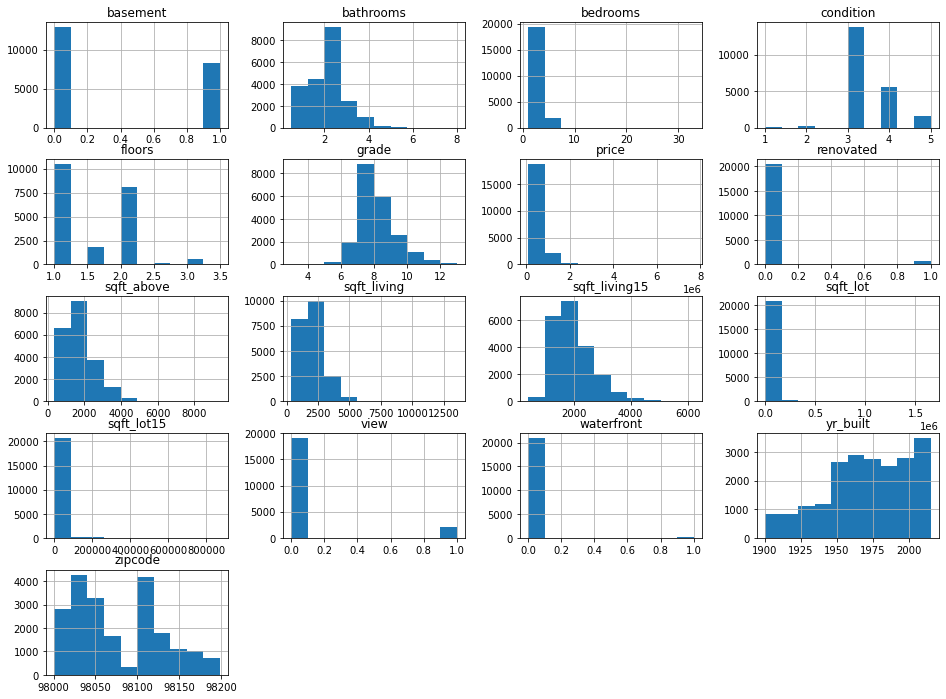

In [1592]:
df.hist(figsize=(16, 12));

In [1593]:
# features
sqft_feats = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'floors']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

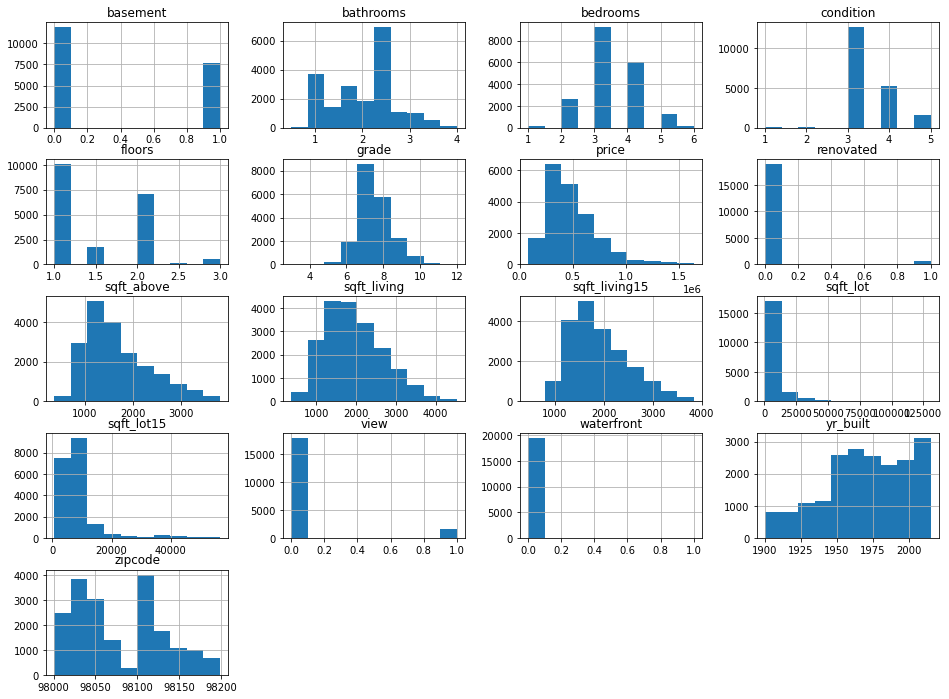

In [1594]:
df.hist(figsize=(16,12));

In [1595]:
df.floors.value_counts()

1.0    10054
2.0     7061
1.5     1752
3.0      564
2.5      114
Name: floors, dtype: int64

In [1596]:
df.bedrooms.value_counts()

3    9220
4    6058
2    2614
5    1274
6     196
1     183
Name: bedrooms, dtype: int64

In [1597]:
df.bathrooms.value_counts()

2.50    4976
1.00    3694
1.75    2900
2.25    1930
2.00    1816
1.50    1394
2.75    1069
3.00     646
3.50     512
3.25     400
3.75      75
0.75      67
4.00      54
1.25       9
0.50       3
Name: bathrooms, dtype: int64

## Normalize Continuous Features

In [1598]:
# Log transform to reduce skewness
# Remember that you can't take the logarithm of zero nor a negative number
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'price', 'bedrooms', 'bathrooms', 'floors']
for var in log_feats:
    df[var]= np.log(df[var])

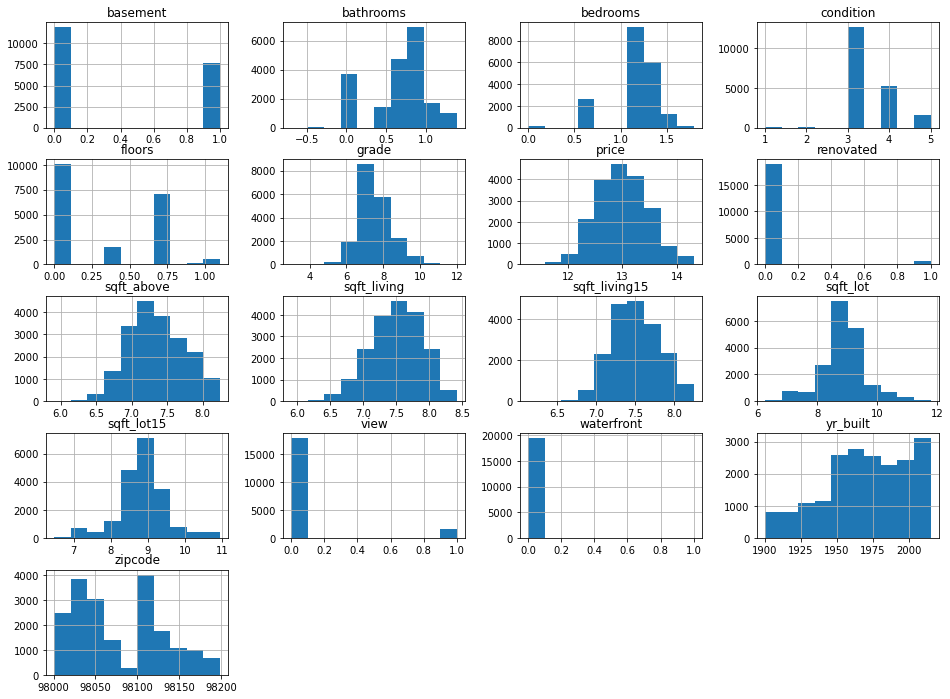

In [1599]:
df.hist(figsize = (16,12));

In [1600]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data more normal, it will just change the mean and the standard error!

continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'price', 'bedrooms', 'bathrooms', 'floors']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

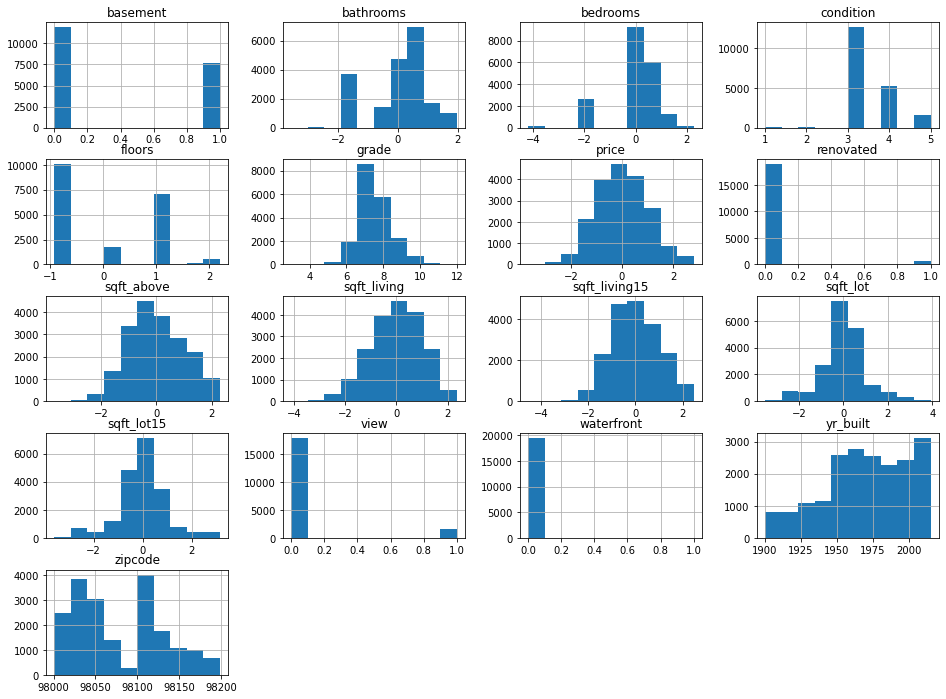

In [1601]:
df.hist(figsize = (16, 12));

In [1602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19545 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19545 non-null  float64
 1   bedrooms       19545 non-null  float64
 2   bathrooms      19545 non-null  float64
 3   sqft_living    19545 non-null  float64
 4   sqft_lot       19545 non-null  float64
 5   floors         19545 non-null  float64
 6   waterfront     19545 non-null  int64  
 7   view           19545 non-null  int64  
 8   condition      19545 non-null  int64  
 9   grade          19545 non-null  int64  
 10  sqft_above     19545 non-null  float64
 11  yr_built       19545 non-null  int64  
 12  zipcode        19545 non-null  int64  
 13  sqft_living15  19545 non-null  float64
 14  sqft_lot15     19545 non-null  float64
 15  renovated      19545 non-null  int64  
 16  basement       19545 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.7 MB


# Explore Data

## What are my top zip codes

In [1603]:
df.zipcode.value_counts()

98103    576
98115    563
98117    538
98052    538
98034    515
        ... 
98010     76
98070     66
98148     54
98024     40
98039     17
Name: zipcode, Length: 70, dtype: int64

In [1604]:
# Create copy
dfziptiers = df.copy()

In [1605]:
# Groupby zipcode and take median price
dfzipmed = dfziptiers.groupby(dfziptiers['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfzipmed = dfzipmed.reset_index()

# Set as string to match
dfzipmed['zipcode'] = dfzipmed['zipcode'].astype('object')

dfzipmed.head(10)

,zipcode,price
0,98039,2.247756
1,98040,1.606194
2,98004,1.589904
3,98112,1.303384
4,98005,1.113439
5,98119,1.061001
6,98109,1.036119
7,98075,1.026863
8,98006,0.996672
9,98102,0.919265


In [1606]:
# Count number of houses in each zipcode

# Get list of unique zipcodes
zipcodelist = list(dfzipmed['zipcode'].unique())

# Create empty dictionary
zipcodecount = {}

# iterate through unique zipcodes and add count to dictionary
for zipcode in zipcodelist:
    count = len(dfziptiers[dfziptiers['zipcode'] == zipcode])
    zipcodecount[zipcode] = count
    
# create DataFrame based on count
dfzipcount = pd.DataFrame.from_dict(zipcodecount, orient='index')
dfzipcount = dfzipcount.reset_index()
dfzipcount = dfzipcount.rename(columns = {'index': 'zipcode', 0 :'count'})
dfzipcount.head()

,zipcode,count
0,98039,17
1,98040,218
2,98004,217
3,98112,212
4,98005,148


In [1607]:
# Merge the two tables
df_zip_price_count = dfzipmed.merge(dfzipcount, how = 'inner')
df_zip_price_count

,zipcode,price,count
0,98039,2.247756,17
1,98040,1.606194,218
2,98004,1.589904,217
3,98112,1.303384,212
4,98005,1.113439,148
...,...,...,...
65,98188,-1.086940,129
66,98001,-1.111359,345
67,98032,-1.203370,122
68,98168,-1.326539,261


In [1608]:
# https://stackoverflow.com/questions/60255203/how-to-label-every-nth-row-of-a-pandas-dataframe-by-an-incremental-value
df_zip_price_count['rank'] = np.divmod(np.arange(len(df_zip_price_count)),7)[0]+1

In [1609]:
df_zip_price_count.head(15)

,zipcode,price,count,rank
0,98039,2.247756,17,1
1,98040,1.606194,218,1
2,98004,1.589904,217,1
3,98112,1.303384,212,1
4,98005,1.113439,148,1
5,98119,1.061001,164,1
6,98109,1.036119,98,1
7,98075,1.026863,287,2
8,98006,0.996672,401,2
9,98102,0.919265,93,2


In [1610]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
0,-1.448625,-0.234561,-1.716352,-1.110551,-0.315715,-0.922555,0,0,3,7,-0.703860,1955,98178,-1.011374,-0.327883,0,0
1,0.436413,-0.234561,0.437524,0.898259,0.019281,1.052297,0,0,3,7,0.859917,1951,98125,-0.245089,0.128905,1,1
2,-1.894049,-1.699959,-1.716352,-2.212206,0.454739,-0.922555,0,0,3,6,-1.799608,1933,98028,1.326398,0.210528,0,0
3,0.682710,0.805156,1.201623,0.198983,-0.480644,-0.922555,0,0,5,7,-1.003477,1965,98136,-0.962453,-0.512981,0,1
4,0.322651,-0.234561,0.124685,-0.198836,0.167041,-0.922555,0,0,3,8,0.202966,1987,98074,-0.036864,0.101699,0,0


In [1611]:
df_zip_price_count.drop(['price', 'count'], axis = 1, inplace = True)

In [1612]:
df = pd.merge(df, df_zip_price_count, on='zipcode')

In [1613]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement,rank
0,-1.448625,-0.234561,-1.716352,-1.110551,-0.315715,-0.922555,0,0,3,7,-0.703860,1955,98178,-1.011374,-0.327883,0,0,9
1,-1.612827,-1.699959,-1.716352,-1.867599,-0.069677,-0.922555,0,0,4,6,-1.456849,1945,98178,-1.403389,-0.051758,0,0,9
2,0.032464,-0.234561,0.437524,0.377035,0.187100,-0.922555,0,1,3,8,0.109615,1967,98178,1.252742,0.327962,0,1,9
3,-1.317501,-0.234561,-1.716352,-0.860609,-0.257744,-0.922555,0,0,3,7,-0.455258,1961,98178,-1.061031,0.124935,0,0,9
4,-2.015709,-1.699959,-1.716352,-1.926929,-0.410953,-0.922555,0,0,3,6,-1.515860,1931,98178,-0.324186,0.338874,0,0,9


In [1614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19545 entries, 0 to 19544
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19545 non-null  float64
 1   bedrooms       19545 non-null  float64
 2   bathrooms      19545 non-null  float64
 3   sqft_living    19545 non-null  float64
 4   sqft_lot       19545 non-null  float64
 5   floors         19545 non-null  float64
 6   waterfront     19545 non-null  int64  
 7   view           19545 non-null  int64  
 8   condition      19545 non-null  int64  
 9   grade          19545 non-null  int64  
 10  sqft_above     19545 non-null  float64
 11  yr_built       19545 non-null  int64  
 12  zipcode        19545 non-null  object 
 13  sqft_living15  19545 non-null  float64
 14  sqft_lot15     19545 non-null  float64
 15  renovated      19545 non-null  int64  
 16  basement       19545 non-null  int64  
 17  rank           19545 non-null  int64  
dtypes: flo

In [1615]:
df.sort_values('price')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement,rank
15072,-3.673975,-1.699959,-1.716352,-2.178906,1.117702,-0.922555,0,0,1,5,-1.766487,1942,98168,-0.225608,0.594291,0,0,10
19118,-3.620087,-4.205073,-2.480452,-3.715747,-0.467216,-0.922555,0,0,2,4,-3.295087,1912,98014,-1.375756,0.101093,0,0,7
15082,-3.593646,-1.699959,-1.716352,-2.349877,0.451361,-0.922555,0,0,1,5,-1.936541,1943,98168,-2.475837,0.377218,0,0,10
1928,-3.567530,-0.234561,-1.716352,-1.926929,0.511036,-0.922555,0,0,3,6,-1.515860,1954,98146,-1.545133,0.715168,0,0,8
14904,-3.554591,-1.699959,-1.716352,-3.225297,1.539074,-0.922555,0,0,2,5,-2.807268,1951,98168,-0.484096,0.620741,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,2.795769,0.805156,1.794305,2.291766,0.172375,2.207511,0,1,3,11,2.137810,2003,98116,1.386547,-0.301313,0,1,3
12006,2.795769,1.611623,0.717367,1.373795,1.137293,1.052297,0,0,4,9,1.767166,1964,98004,2.377969,1.414566,0,0,1
3174,2.808787,-0.234561,0.717367,1.390445,-0.072666,1.052297,0,1,4,9,1.274125,1946,98115,1.215288,0.126325,0,1,3
11838,2.808787,1.611623,1.611056,2.178113,1.784266,-0.922555,0,0,3,10,0.787944,1958,98004,2.111450,2.387735,1,1,1


## Check for linearity: Joint Plots

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

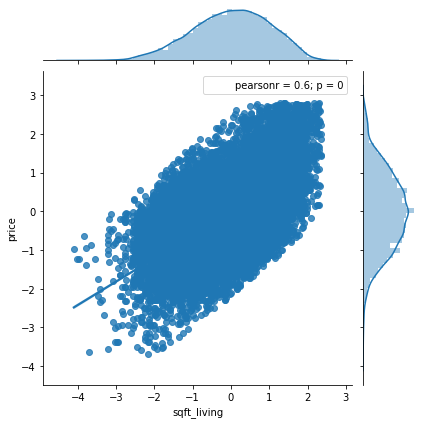

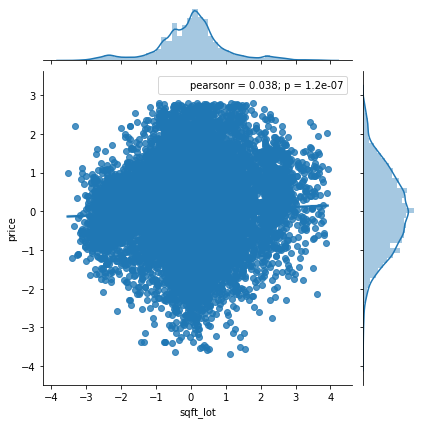

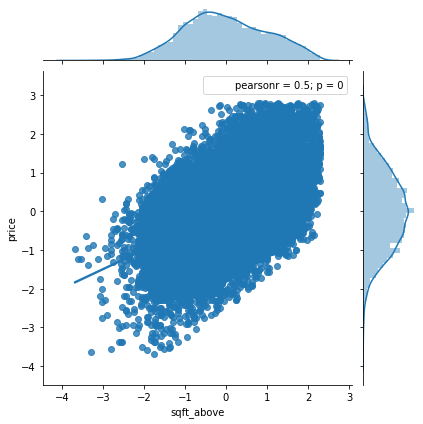

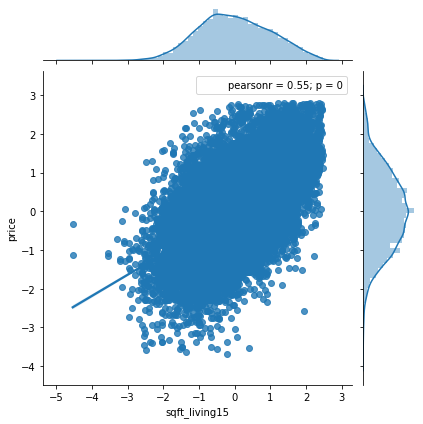

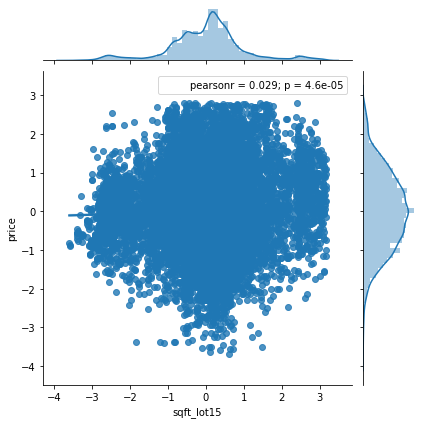

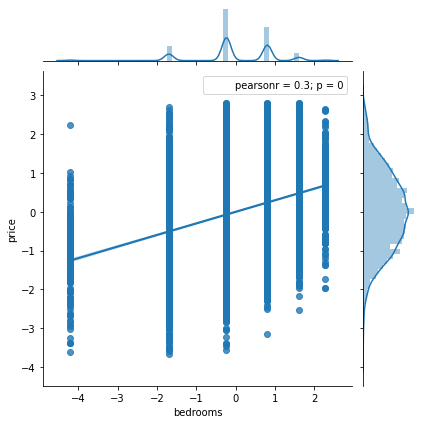

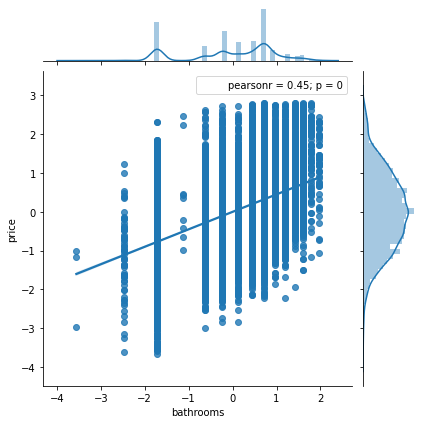

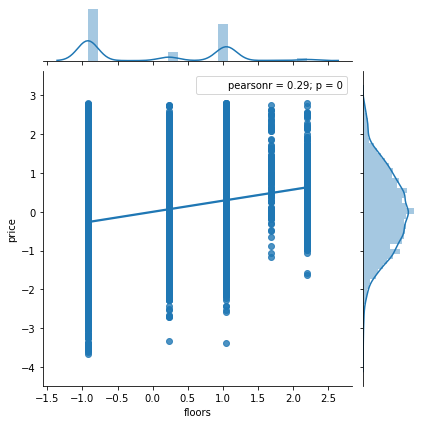

In [1616]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

## Check for linearity: Box Plots

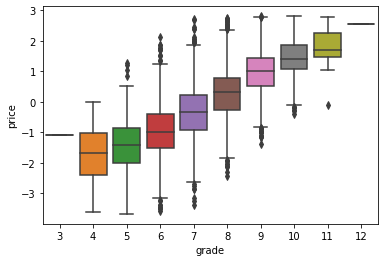

In [1617]:
sns.boxplot(x = df['grade'], y = df['price'])

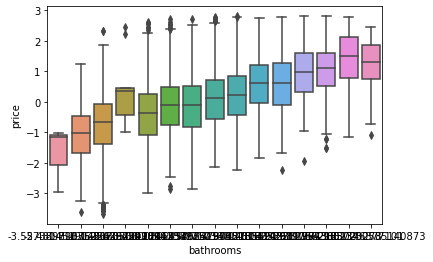

In [1618]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

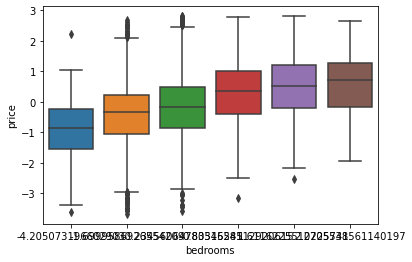

In [1619]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

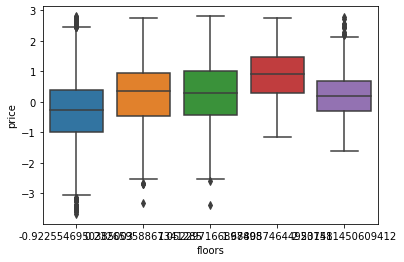

In [1620]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

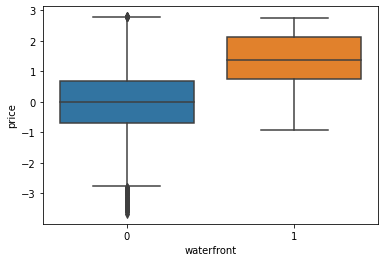

In [1621]:
sns.boxplot(x = df['waterfront'], y = df['price'])

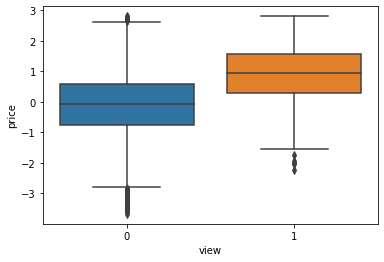

In [1622]:
sns.boxplot(x = df['view'], y = df['price'])

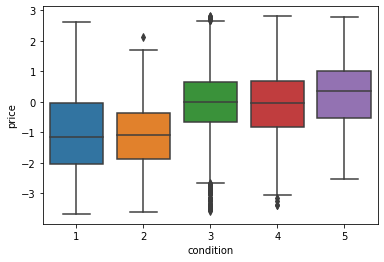

In [1623]:
sns.boxplot(x = df['condition'], y = df['price'])

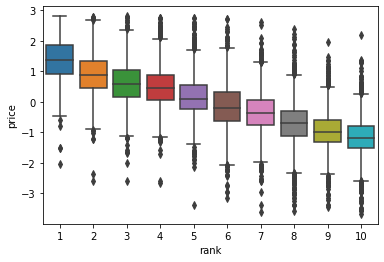

In [1624]:
sns.boxplot(x = df['rank'], y = df['price'])

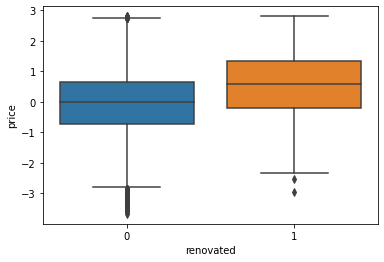

In [1625]:
sns.boxplot(x = df['renovated'], y = df['price'])

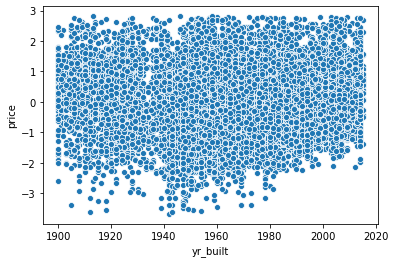

In [1626]:
sns.scatterplot(x = df['yr_built'], y = df['price'])

## Check for multicollinearity

In [1627]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.298117,0.450068,0.604596,0.037859,0.286331,0.076759,0.266107,0.058972,0.630984,0.497917,0.036645,0.545650,0.029140,0.096071,0.219348,-0.731282
bedrooms,0.298117,1.000000,0.506614,0.646211,0.222292,0.186379,-0.036719,0.041952,0.036387,0.353718,0.532583,0.191406,0.409192,0.204570,-0.001804,0.150689,-0.034956
bathrooms,0.450068,0.506614,1.000000,0.730022,0.001110,0.497049,-0.002394,0.097409,-0.106817,0.607445,0.642845,0.542441,0.534422,0.002558,0.028008,0.166559,-0.151363
sqft_living,0.604596,0.646211,0.730022,1.000000,0.273918,0.361925,0.011712,0.180861,-0.034465,0.689984,0.836282,0.337518,0.717285,0.253959,0.036595,0.248286,-0.188788
sqft_lot,0.037859,0.222292,0.001110,0.273918,1.000000,-0.319744,0.058261,0.077048,0.119170,0.084570,0.250870,-0.078134,0.336251,0.909960,0.014911,-0.042802,0.141023
floors,0.286331,0.186379,0.497049,0.361925,-0.319744,1.000000,-0.000430,-0.016783,-0.263562,0.460495,0.570358,0.480538,0.270249,-0.307429,0.003356,-0.277706,-0.146744
waterfront,0.076759,-0.036719,-0.002394,0.011712,0.058261,-0.000430,1.000000,0.190964,0.005129,0.006973,-0.000167,-0.033047,0.031520,0.068679,0.066349,0.017251,0.021781
view,0.266107,0.041952,0.097409,0.180861,0.077048,-0.016783,0.190964,1.000000,0.044877,0.164738,0.081103,-0.086481,0.215955,0.073973,0.069704,0.181091,-0.064071
condition,0.058972,0.036387,-0.106817,-0.034465,0.119170,-0.263562,0.005129,0.044877,1.000000,-0.149007,-0.144694,-0.354071,-0.083167,0.124593,-0.057038,0.131149,-0.032962
grade,0.630984,0.353718,0.607445,0.689984,0.084570,0.460495,0.006973,0.164738,-0.149007,1.000000,0.692376,0.459888,0.641103,0.098060,0.005771,0.041720,-0.324838


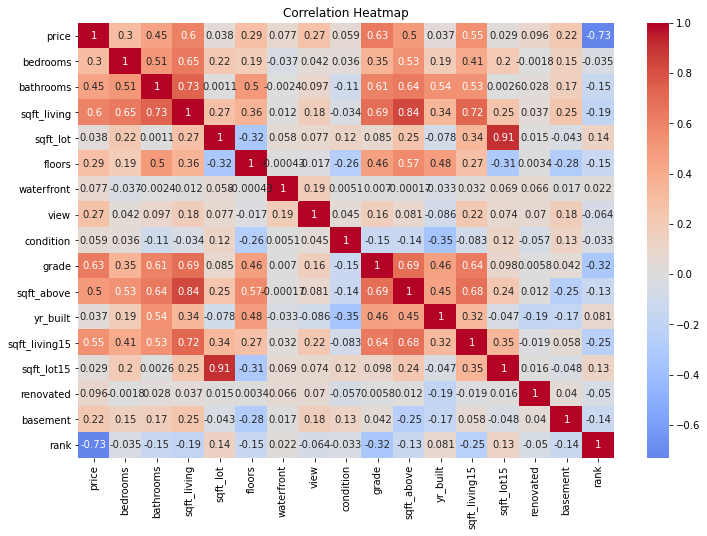

In [1628]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [1629]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.298117,0.450068,0.604596,0.037859,0.286331,0.076759,0.266107,0.058972,0.630984,0.497917,0.036645,0.545650,0.029140,0.096071,0.219348,-0.731282
bedrooms,0.298117,1.000000,0.506614,0.646211,0.222292,0.186379,-0.036719,0.041952,0.036387,0.353718,0.532583,0.191406,0.409192,0.204570,-0.001804,0.150689,-0.034956
bathrooms,0.450068,0.506614,1.000000,0.730022,0.001110,0.497049,-0.002394,0.097409,-0.106817,0.607445,0.642845,0.542441,0.534422,0.002558,0.028008,0.166559,-0.151363
sqft_living,0.604596,0.646211,0.730022,1.000000,0.273918,0.361925,0.011712,0.180861,-0.034465,0.689984,0.836282,0.337518,0.717285,0.253959,0.036595,0.248286,-0.188788
sqft_lot,0.037859,0.222292,0.001110,0.273918,1.000000,-0.319744,0.058261,0.077048,0.119170,0.084570,0.250870,-0.078134,0.336251,0.909960,0.014911,-0.042802,0.141023
floors,0.286331,0.186379,0.497049,0.361925,-0.319744,1.000000,-0.000430,-0.016783,-0.263562,0.460495,0.570358,0.480538,0.270249,-0.307429,0.003356,-0.277706,-0.146744
waterfront,0.076759,-0.036719,-0.002394,0.011712,0.058261,-0.000430,1.000000,0.190964,0.005129,0.006973,-0.000167,-0.033047,0.031520,0.068679,0.066349,0.017251,0.021781
view,0.266107,0.041952,0.097409,0.180861,0.077048,-0.016783,0.190964,1.000000,0.044877,0.164738,0.081103,-0.086481,0.215955,0.073973,0.069704,0.181091,-0.064071
condition,0.058972,0.036387,-0.106817,-0.034465,0.119170,-0.263562,0.005129,0.044877,1.000000,-0.149007,-0.144694,-0.354071,-0.083167,0.124593,-0.057038,0.131149,-0.032962
grade,0.630984,0.353718,0.607445,0.689984,0.084570,0.460495,0.006973,0.164738,-0.149007,1.000000,0.692376,0.459888,0.641103,0.098060,0.005771,0.041720,-0.324838


In [1630]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [1631]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [1632]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.909960
"(sqft_living, sqft_above)",0.836282


In [1633]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode'], inplace=True) 

In [1634]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'renovated',
       'basement', 'rank'],
      dtype='object')

In [1635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19545 entries, 0 to 19544
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19545 non-null  float64
 1   bedrooms     19545 non-null  float64
 2   bathrooms    19545 non-null  float64
 3   sqft_living  19545 non-null  float64
 4   sqft_lot     19545 non-null  float64
 5   floors       19545 non-null  float64
 6   waterfront   19545 non-null  int64  
 7   view         19545 non-null  int64  
 8   condition    19545 non-null  int64  
 9   grade        19545 non-null  int64  
 10  yr_built     19545 non-null  int64  
 11  renovated    19545 non-null  int64  
 12  basement     19545 non-null  int64  
 13  rank         19545 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.9 MB


## Save Results

In [1636]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [1637]:
categorical_feats = ['view', 'basement', 'condition', 'grade', 'renovated', 'waterfront', 'yr_built', 'rank']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [1638]:
df = pd.get_dummies(df, drop_first = True)

In [1639]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
0,-1.448625,-0.234561,-1.716352,-1.110551,-0.315715,-0.922555,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.612827,-1.699959,-1.716352,-1.867599,-0.069677,-0.922555,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.032464,-0.234561,0.437524,0.377035,0.187100,-0.922555,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,-1.317501,-0.234561,-1.716352,-0.860609,-0.257744,-0.922555,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-2.015709,-1.699959,-1.716352,-1.926929,-0.410953,-0.922555,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [1640]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [1641]:
df.columns = [col_formatting(col) for col in df.columns]

In [1642]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 

In [1643]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [1644]:
train, test = train_test_split(df)

In [1645]:
print(len(train), len(test))
train.head()

14658 4887


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
8167,-0.603909,0.805156,0.437524,0.753701,0.064720,1.052297,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8645,-0.953623,0.805156,0.717367,0.164520,-0.309281,1.052297,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5321,-0.275804,-0.234561,0.437524,0.145771,-0.526486,-0.922555,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9288,1.056633,0.805156,1.414221,1.524644,0.558721,1.052297,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17500,0.237501,0.805156,0.437524,1.119461,0.558596,-0.922555,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [1646]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
9275,0.456887,2.270554,0.437524,1.137829,1.054831,0.232660,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5866,-0.991974,-0.234561,-0.639414,-0.669357,0.420573,-0.922555,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14845,-1.034975,-1.699959,-1.716352,-1.724982,-0.781770,-0.922555,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
13693,-0.603909,-1.699959,-1.716352,-1.867599,-1.895039,1.052297,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7583,0.577981,-0.234561,0.124685,0.437760,-0.822874,-0.922555,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [1647]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     530.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:20   Log-Likelihood:                -7294.1
No. Observations:               14658   AIC:                         1.488e+04
Df Residuals:                   14511   BIC:                         1.600e+04
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3417      0.120     11.146      0.000       1.106       1.578
bedrooms         -0.0088      0.005     -1.876      0.061      -0.018       0.000
bathrooms         0.0509      0.006      8.328      0.000       0.039       0.063
sqft_living       0.3242      0.007     44.501      0.000       0.310       0.339
sqft_lot          0.0477      0.005      9.625      0.000       0.038       0.057
floors           -0.0040      0.006     -0.707      0.479      -0.015       0.007
waterfront_1      1.0082      0.060     16.893      0.000       0.891       1.125
view_1            0.3662      0.013     27.862      0.000       0.340       0.392
condition_2       0.2180      0.111      1.958      0.050      -0.000       0.436
condition_3       0.5656      0.105      5.379      0.000       0.359       0.772
condition_4       0.6295      0.105      5.986      0.000       0.423       0.836
condition_5       0.7415      0.106      7.019      0.000       0.534       0.949
grade_11          0.1997      0.053      3.776      0.000       0.096       0.303
grade_12         -0.0921      0.402     -0.229      0.819      -0.881       0.697
grade_3          -0.1361      0.404     -0.337      0.736      -0.929       0.657
grade_4          -1.2369      0.089    -13.862      0.000      -1.412      -1.062
grade_5          -1.2819      0.042    -30.730      0.000      -1.364      -1.200
grade_6          -0.9539      0.026    -36.275      0.000      -1.005      -0.902
grade_7          -0.6936      0.021    -32.288      0.000      -0.736      -0.651
grade_8          -0.4796      0.020    -24.342      0.000      -0.518      -0.441
grade_9          -0.1823      0.020     -9.102      0.000      -0.222      -0.143
yr_built_1901    -0.2108      0.104     -2.031      0.042      -0.414      -0.007
yr_built_1902    -0.0258      0.104     -0.249      0.804      -0.230       0.178
yr_built_1903    -0.1863      0.089     -2.091      0.037      -0.361      -0.012
yr_built_1904    -0.0389      0.086     -0.454      0.650      -0.207       0.129
yr_built_1905    -0.0519      0.080     -0.648      0.517      -0.209       0.105
yr_built_1906    -0.0168      0.073     -0.232      0.817      -0.159       0.126
yr_built_1907    -0.0337      0.083     -0.406      0.685      -0.196       0.129
yr_built_1908    -0.2763      0.072     -3.816      0.000      -0.418      -0.134
yr_built_1909    -0.0729      0.072     -1.011      0.312      -0.214       0.068
yr_built_1910    -0.0948      0.066     -1.434      0.152      -0.224       0.035
yr_built_1911    -0.0388      0.078     -0.499      0.618      -0.191       0.114
yr_built_1912    -0.1624      0.076     -2.131      0.033      -0.312      -0.013
yr_built_1913    -0.1390      0.082     -1.686      0.092      -0.300       0.023
yr_built_1914    -0.1660      0.084     -1.984   

## Remove the Uninfluential Features

In [1648]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

147 106
['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront_1', 'view_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.3417,0.120,11.146,0.000,1.106,1.578
bedrooms,-0.0088,0.005,-1.876,0.061,-0.018,0.000
bathrooms,0.0509,0.006,8.328,0.000,0.039,0.063
sqft_living,0.3242,0.007,44.501,0.000,0.310,0.339
sqft_lot,0.0477,0.005,9.625,0.000,0.038,0.057


In [1649]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     729.6
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:21   Log-Likelihood:                -7315.7
No. Observations:               14658   AIC:                         1.485e+04
Df Residuals:                   14551   BIC:                         1.566e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4820      0.044     33.935      0.000       1.396       1.568
bathrooms         0.0487      0.006      8.202      0.000       0.037       0.060
sqft_living       0.3201      0.006     51.433      0.000       0.308       0.332
sqft_lot          0.0462      0.005     10.077      0.000       0.037       0.055
waterfront_1      1.0051      0.059     16.927      0.000       0.889       1.121
view_1            0.3682      0.013     28.345      0.000       0.343       0.394
condition_3       0.3682      0.037     10.059      0.000       0.296       0.440
condition_4       0.4333      0.037     11.792      0.000       0.361       0.505
condition_5       0.5456      0.038     14.309      0.000       0.471       0.620
grade_11          0.2012      0.053      3.805      0.000       0.098       0.305
grade_4          -1.2446      0.089    -14.043      0.000      -1.418      -1.071
grade_5          -1.2906      0.041    -31.368      0.000      -1.371      -1.210
grade_6          -0.9563      0.026    -36.904      0.000      -1.007      -0.905
grade_7          -0.6932      0.021    -32.834      0.000      -0.735      -0.652
grade_8          -0.4804      0.020    -24.577      0.000      -0.519      -0.442
grade_9          -0.1825      0.020     -9.143      0.000      -0.222      -0.143
yr_built_1901    -0.1550      0.090     -1.722      0.085      -0.331       0.021
yr_built_1903    -0.1263      0.072     -1.744      0.081      -0.268       0.016
yr_built_1908    -0.2170      0.050     -4.300      0.000      -0.316      -0.118
yr_built_1912    -0.1014      0.056     -1.818      0.069      -0.211       0.008
yr_built_1914    -0.1015      0.066     -1.546      0.122      -0.230       0.027
yr_built_1929    -0.0926      0.043     -2.147      0.032      -0.177      -0.008
yr_built_1930    -0.1208      0.055     -2.187      0.029      -0.229      -0.013
yr_built_1936    -0.1434      0.081     -1.776      0.076      -0.302       0.015
yr_built_1942    -0.1399      0.033     -4.222      0.000      -0.205      -0.075
yr_built_1943    -0.2143      0.037     -5.784      0.000      -0.287      -0.142
yr_built_1944    -0.1749      0.042     -4.148      0.000      -0.258      -0.092
yr_built_1946    -0.0851      0.044     -1.928      0.054      -0.172       0.001
yr_built_1947    -0.1603      0.030     -5.260      0.000      -0.220      -0.101
yr_built_1948    -0.1528      0.032     -4.727      0.000      -0.216      -0.089
yr_built_1949    -0.0866      0.036     -2.414      0.016      -0.157      -0.016
yr_built_1950    -0.1340      0.031     -4.350      0.000      -0.194      -0.074
yr_built_1951    -0.1639      0.033     -4.966      0.000      -0.229      -0.099
yr_built_1952    -0.1365      0.034     -4.013      0.000      -0.203      -0.070
yr_built_1953    -0.2403      0.034     -7.109   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [1650]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.2355184935443684),
 ('sqft_living', 3.4626414595528194),
 ('sqft_lot', 1.9364618428792377),
 ('waterfront_1', 1.0564502531742819),
 ('view_1', 1.2484338171920726),
 ('condition_3', 26.577683030715058),
 ('condition_4', 11.230854462076184),
 ('condition_5', 3.9915984541905507),
 ('grade_11', 1.116193015569898),
 ('grade_4', 1.0809174174043852),
 ('grade_5', 1.5276413825723913),
 ('grade_6', 5.147430083999509),
 ('grade_7', 14.967045422515753),
 ('grade_8', 8.736153907475778),
 ('grade_9', 3.7270631195650163),
 ('yr_built_1901', 1.0113024126686132),
 ('yr_built_1903', 1.016468838419851),
 ('yr_built_1908', 1.029496986563461),
 ('yr_built_1912', 1.0278976006033111),
 ('yr_built_1914', 1.0196352878932966),
 ('yr_built_1929', 1.0415115237509929),
 ('yr_built_1930', 1.0312545175800005),
 ('yr_built_1936', 1.0170928500986434),
 ('yr_built_1942', 1.098820724574059),
 ('yr_built_1943', 1.0823870209612465),
 ('yr_built_1944', 1.0662546999395366),
 ('yr_built_1946', 1.04426107127

## Perform Another Round of Feature Selection

In [1651]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

106 101


In [1652]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     671.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:30   Log-Likelihood:                -8118.9
No. Observations:               14658   AIC:                         1.644e+04
Df Residuals:                   14556   BIC:                         1.722e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2757      0.018     72.167      0.000       1.241       1.310
bathrooms         0.0540      0.006      8.677      0.000       0.042       0.066
sqft_living       0.4129      0.006     67.857      0.000       0.401       0.425
sqft_lot          0.0472      0.005      9.886      0.000       0.038       0.057
waterfront_1      1.0161      0.063     16.205      0.000       0.893       1.139
view_1            0.4308      0.014     31.717      0.000       0.404       0.457
condition_5       0.1436      0.014     10.533      0.000       0.117       0.170
grade_11          0.5245      0.054      9.752      0.000       0.419       0.630
grade_4          -0.3455      0.089     -3.863      0.000      -0.521      -0.170
grade_5          -0.4357      0.035    -12.428      0.000      -0.504      -0.367
grade_9           0.2468      0.012     20.072      0.000       0.223       0.271
yr_built_1901    -0.1685      0.095     -1.772      0.076      -0.355       0.018
yr_built_1903    -0.1216      0.077     -1.589      0.112      -0.272       0.028
yr_built_1908    -0.2404      0.053     -4.512      0.000      -0.345      -0.136
yr_built_1912    -0.0794      0.059     -1.348      0.178      -0.195       0.036
yr_built_1914    -0.1471      0.069     -2.124      0.034      -0.283      -0.011
yr_built_1929    -0.0555      0.046     -1.219      0.223      -0.145       0.034
yr_built_1930    -0.0343      0.058     -0.588      0.557      -0.149       0.080
yr_built_1936    -0.1652      0.085     -1.938      0.053      -0.332       0.002
yr_built_1942    -0.1646      0.035     -4.717      0.000      -0.233      -0.096
yr_built_1943    -0.2514      0.039     -6.443      0.000      -0.328      -0.175
yr_built_1944    -0.2318      0.044     -5.226      0.000      -0.319      -0.145
yr_built_1946    -0.1101      0.047     -2.365      0.018      -0.201      -0.019
yr_built_1947    -0.1655      0.032     -5.144      0.000      -0.229      -0.102
yr_built_1948    -0.1523      0.034     -4.465      0.000      -0.219      -0.085
yr_built_1949    -0.0766      0.038     -2.021      0.043      -0.151      -0.002
yr_built_1950    -0.1274      0.033     -3.919      0.000      -0.191      -0.064
yr_built_1951    -0.1371      0.035     -3.935      0.000      -0.205      -0.069
yr_built_1952    -0.0874      0.036     -2.439      0.015      -0.158      -0.017
yr_built_1953    -0.1863      0.036     -5.229      0.000      -0.256      -0.116
yr_built_1954    -0.2063      0.031     -6.632      0.000      -0.267      -0.145
yr_built_1955    -0.2848      0.032     -8.908      0.000      -0.347      -0.222
yr_built_1956    -0.2575      0.037     -6.934      0.000      -0.330      -0.185
yr_built_1957    -0.3122      0.037     -8.533      0.000      -0.384      -0.240
yr_built_1958    -0.3432      0.035     -9.864   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [1653]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

102 93
['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront_1', 'view_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.2757,0.018,72.167,0.0,1.241,1.310
bathrooms,0.0540,0.006,8.677,0.0,0.042,0.066
sqft_living,0.4129,0.006,67.857,0.0,0.401,0.425
sqft_lot,0.0472,0.005,9.886,0.0,0.038,0.057
waterfront_1,1.0161,0.063,16.205,0.0,0.893,1.139


In [1654]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     728.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:31   Log-Likelihood:                -8125.5
No. Observations:               14658   AIC:                         1.644e+04
Df Residuals:                   14564   BIC:                         1.715e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2651      0.017     73.949      0.000       1.232       1.299
bathrooms         0.0532      0.006      8.765      0.000       0.041       0.065
sqft_living       0.4129      0.006     67.922      0.000       0.401       0.425
sqft_lot          0.0477      0.005     10.142      0.000       0.038       0.057
waterfront_1      1.0135      0.063     16.166      0.000       0.891       1.136
view_1            0.4313      0.014     31.941      0.000       0.405       0.458
condition_5       0.1448      0.014     10.725      0.000       0.118       0.171
grade_11          0.5241      0.054      9.743      0.000       0.419       0.629
grade_4          -0.3544      0.089     -3.969      0.000      -0.529      -0.179
grade_5          -0.4371      0.035    -12.476      0.000      -0.506      -0.368
grade_9           0.2453      0.012     20.195      0.000       0.221       0.269
yr_built_1908    -0.2299      0.053     -4.326      0.000      -0.334      -0.126
yr_built_1914    -0.1362      0.069     -1.971      0.049      -0.272      -0.001
yr_built_1942    -0.1543      0.035     -4.449      0.000      -0.222      -0.086
yr_built_1943    -0.2410      0.039     -6.207      0.000      -0.317      -0.165
yr_built_1944    -0.2215      0.044     -5.015      0.000      -0.308      -0.135
yr_built_1946    -0.0997      0.046     -2.148      0.032      -0.191      -0.009
yr_built_1947    -0.1550      0.032     -4.856      0.000      -0.218      -0.092
yr_built_1948    -0.1417      0.034     -4.186      0.000      -0.208      -0.075
yr_built_1949    -0.0661      0.038     -1.755      0.079      -0.140       0.008
yr_built_1950    -0.1169      0.032     -3.624      0.000      -0.180      -0.054
yr_built_1951    -0.1267      0.035     -3.662      0.000      -0.194      -0.059
yr_built_1952    -0.0769      0.036     -2.161      0.031      -0.147      -0.007
yr_built_1953    -0.1758      0.035     -4.969      0.000      -0.245      -0.106
yr_built_1954    -0.1959      0.031     -6.354      0.000      -0.256      -0.135
yr_built_1955    -0.2745      0.032     -8.655      0.000      -0.337      -0.212
yr_built_1956    -0.2468      0.037     -6.695      0.000      -0.319      -0.175
yr_built_1957    -0.3015      0.036     -8.306      0.000      -0.373      -0.230
yr_built_1958    -0.3326      0.035     -9.638      0.000      -0.400      -0.265
yr_built_1959    -0.3831      0.028    -13.491      0.000      -0.439      -0.327
yr_built_1960    -0.3154      0.033     -9.567      0.000      -0.380      -0.251
yr_built_1961    -0.3613      0.036    -10.069      0.000      -0.432      -0.291
yr_built_1962    -0.3591      0.030    -11.818      0.000      -0.419      -0.300
yr_built_1963    -0.3496      0.033    -10.594      0.000      -0.414      -0.285
yr_built_1964    -0.3324      0.040     -8.263   

# Check the Normality Assumption

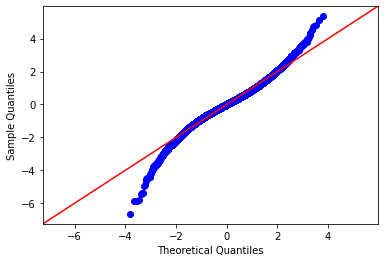

In [1655]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

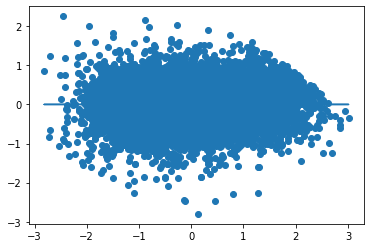

In [1656]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [1657]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.41153507, 0.41453958, 0.43794105, 0.42026539, 0.44503878,
       0.42593414, 0.42746944, 0.41959069, 0.41763087, 0.42075253])

0.42406975468317204

0.009910031390333118

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

# Model 2: rank zip

In [1658]:
model_3_df = df[['price',
 'bedrooms',
 'bathrooms',               
 'sqft_living',
 'floors',
 'waterfront_1',
 'view_1',              
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'renovated_1',
 'rank_10',
 'rank_2',
 'rank_3',
 'rank_4',
 'rank_5',
 'rank_6',
 'rank_7',
 'rank_8',
 'rank_9']]

In [1659]:
model_3_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront_1,view_1,condition_2,condition_3,condition_4,...,renovated_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
0,-1.448625,-0.234561,-1.716352,-1.110551,-0.922555,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.612827,-1.699959,-1.716352,-1.867599,-0.922555,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.032464,-0.234561,0.437524,0.377035,-0.922555,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.317501,-0.234561,-1.716352,-0.860609,-0.922555,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-2.015709,-1.699959,-1.716352,-1.926929,-0.922555,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1660]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [1661]:
print(len(train), len(test))
train.head()

14658 4887


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
8167,-0.603909,0.805156,0.437524,0.753701,0.064720,1.052297,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8645,-0.953623,0.805156,0.717367,0.164520,-0.309281,1.052297,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5321,-0.275804,-0.234561,0.437524,0.145771,-0.526486,-0.922555,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9288,1.056633,0.805156,1.414221,1.524644,0.558721,1.052297,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17500,0.237501,0.805156,0.437524,1.119461,0.558596,-0.922555,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [1662]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
9275,0.456887,2.270554,0.437524,1.137829,1.054831,0.232660,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5866,-0.991974,-0.234561,-0.639414,-0.669357,0.420573,-0.922555,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14845,-1.034975,-1.699959,-1.716352,-1.724982,-0.781770,-0.922555,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
13693,-0.603909,-1.699959,-1.716352,-1.867599,-1.895039,1.052297,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7583,0.577981,-0.234561,0.124685,0.437760,-0.822874,-0.922555,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [1663]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3043.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:32   Log-Likelihood:                -8800.0
No. Observations:               14658   AIC:                         1.764e+04
Df Residuals:                   14637   BIC:                         1.780e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4254      0.115      3.692      0.000       0.200       0.651
bedrooms        -0.0442      0.005     -8.975      0.000      -0.054      -0.035
bathrooms        0.0013      0.006      0.219      0.826      -0.010       0.013
sqft_living      0.4927      0.006     78.775      0.000       0.480       0.505
floors           0.0442      0.004      9.962      0.000       0.035       0.053
waterfront_1     0.9982      0.065     15.268      0.000       0.870       1.126
view_1           0.4557      0.014     32.529      0.000       0.428       0.483
condition_2      0.3335      0.122      2.744      0.006       0.095       0.572
condition_3      0.6629      0.114      5.799      0.000       0.439       0.887
condition_4      0.7154      0.114      6.255      0.000       0.491       0.940
condition_5      0.8643      0.115      7.519      0.000       0.639       1.090
renovated_1      0.2086      0.021     10.007      0.000       0.168       0.249
rank_10         -2.1483      0.020   -105.628      0.000      -2.188      -2.108
rank_2          -0.5096      0.019    -26.593      0.000      -0.547      -0.472
rank_3          -0.6357      0.019    -34.025      0.000      -0.672      -0.599
rank_4          -0.6331      0.019    -33.607      0.000      -0.670      -0.596
rank_5          -1.0339      0.019    -53.721      0.000      -1.072      -0.996
rank_6          -1.3189      0.019    -68.411      0.000      -1.357      -1.281
rank_7          -1.3125      0.020    -66.606      0.000      -1.351      -1.274
rank_8          -1.7900      0.019    -93.489      0.000      -1.828      -1.752
rank_9          -2.0680      0.019   -106.862      0.000      -2.106      -2.030
==============================================================================
Omnibus:                      440.673   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.155
Skew:                          -0.014   Prob(JB):                    2.42e-256
Kurtosis:                       4.388   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Remove Uninfluential features part 2

In [1664]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

21 19
['bedrooms', 'sqft_living', 'floors', 'waterfront_1', 'view_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,0.4254,0.115,3.692,0.000,0.200,0.651
bedrooms,-0.0442,0.005,-8.975,0.000,-0.054,-0.035
bathrooms,0.0013,0.006,0.219,0.826,-0.010,0.013
sqft_living,0.4927,0.006,78.775,0.000,0.480,0.505
floors,0.0442,0.004,9.962,0.000,0.035,0.053


In [1665]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3203.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:32   Log-Likelihood:                -8800.0
No. Observations:               14658   AIC:                         1.764e+04
Df Residuals:                   14638   BIC:                         1.779e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4249      0.115      3.688      0.000       0.199       0.651
bedrooms        -0.0441      0.005     -8.998      0.000      -0.054      -0.034
sqft_living      0.4934      0.005     93.086      0.000       0.483       0.504
floors           0.0445      0.004     10.665      0.000       0.036       0.053
waterfront_1     0.9981      0.065     15.268      0.000       0.870       1.126
view_1           0.4557      0.014     32.531      0.000       0.428       0.483
condition_2      0.3338      0.122      2.747      0.006       0.096       0.572
condition_3      0.6634      0.114      5.806      0.000       0.439       0.887
condition_4      0.7158      0.114      6.259      0.000       0.492       0.940
condition_5      0.8648      0.115      7.526      0.000       0.640       1.090
renovated_1      0.2086      0.021     10.009      0.000       0.168       0.249
rank_10         -2.1483      0.020   -105.634      0.000      -2.188      -2.108
rank_2          -0.5095      0.019    -26.594      0.000      -0.547      -0.472
rank_3          -0.6357      0.019    -34.026      0.000      -0.672      -0.599
rank_4          -0.6330      0.019    -33.608      0.000      -0.670      -0.596
rank_5          -1.0338      0.019    -53.729      0.000      -1.072      -0.996
rank_6          -1.3190      0.019    -68.417      0.000      -1.357      -1.281
rank_7          -1.3125      0.020    -66.615      0.000      -1.351      -1.274
rank_8          -1.7899      0.019    -93.521      0.000      -1.827      -1.752
rank_9          -2.0679      0.019   -106.928      0.000      -2.106      -2.030
==============================================================================
Omnibus:                      440.856   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.742
Skew:                          -0.015   Prob(JB):                    1.81e-256
Kurtosis:                       4.388   Cond. No.                         95.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluate Model using sci-kit learn's cross_val_score

In [1666]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.42599912, 0.43688549, 0.45078826, 0.44324071, 0.45809254,
       0.44983617, 0.44428174, 0.43781923, 0.43224929, 0.44152594])

0.44207184812181016

0.008940185297157715

# Check the Normality Assumption

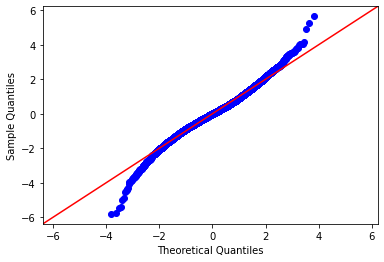

In [1667]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

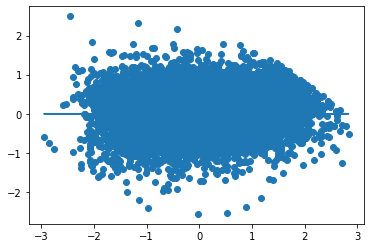

In [1668]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [1669]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.7810612364989262),
 ('sqft_living', 2.1130914400858236),
 ('floors', 1.3093062445565424),
 ('waterfront_1', 1.0508914967994432),
 ('view_1', 1.1999648539027383),
 ('condition_2', 1.1384287863326796),
 ('condition_3', 12.578768483718134),
 ('condition_4', 5.461871618406555),
 ('condition_5', 2.344095103039843),
 ('renovated_1', 1.052069425915908),
 ('rank_10', 2.5137763925941035),
 ('rank_2', 2.8751737757284017),
 ('rank_3', 3.253202812522296),
 ('rank_4', 3.1660309771412596),
 ('rank_5', 2.9048197480562163),
 ('rank_6', 2.8813087146367478),
 ('rank_7', 2.7954761022382137),
 ('rank_8', 3.043670948696215),
 ('rank_9', 2.858473217646025)]

## Perform Another Round of Feature Selection

In [1670]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

19 17


In [1671]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     3559.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -8835.3
No. Observations:               14658   AIC:                         1.771e+04
Df Residuals:                   14640   BIC:                         1.784e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1103      0.016     70.682      0.000       1.079       1.141
bedrooms        -0.0422      0.005     -8.603      0.000      -0.052      -0.033
sqft_living      0.4934      0.005     92.911      0.000       0.483       0.504
floors           0.0379      0.004      9.436      0.000       0.030       0.046
waterfront_1     0.9909      0.065     15.135      0.000       0.863       1.119
view_1           0.4575      0.014     32.591      0.000       0.430       0.485
condition_2     -0.3469      0.042     -8.190      0.000      -0.430      -0.264
condition_5      0.1830      0.014     13.266      0.000       0.156       0.210
renovated_1      0.2012      0.021      9.652      0.000       0.160       0.242
rank_10         -2.1555      0.020   -105.915      0.000      -2.195      -2.116
rank_2          -0.5159      0.019    -26.895      0.000      -0.554      -0.478
rank_3          -0.6443      0.019    -34.497      0.000      -0.681      -0.608
rank_4          -0.6362      0.019    -33.713      0.000      -0.673      -0.599
rank_5          -1.0443      0.019    -54.354      0.000      -1.082      -1.007
rank_6          -1.3249      0.019    -68.680      0.000      -1.363      -1.287
rank_7          -1.3217      0.020    -67.149      0.000      -1.360      -1.283
rank_8          -1.7998      0.019    -94.153      0.000      -1.837      -1.762
rank_9          -2.0738      0.019   -107.104      0.000      -2.112      -2.036
==============================================================================
Omnibus:                      473.620   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1304.738
Skew:                          -0.046   Prob(JB):                    4.78e-284
Kurtosis:                       4.459   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1672]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.42956257, 0.43785833, 0.45207139, 0.44319347, 0.46162152,
       0.44787569, 0.44148793, 0.43858389, 0.43286756, 0.44200973])

0.4427132098804497

0.008857058517651768

In [1673]:
# Save model
#tuple_objects = (linreg, X_train, y_train)
#pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [1674]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
9275,0.456887,2.270554,0.437524,1.137829,1.054831,0.232660,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5866,-0.991974,-0.234561,-0.639414,-0.669357,0.420573,-0.922555,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14845,-1.034975,-1.699959,-1.716352,-1.724982,-0.781770,-0.922555,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
13693,-0.603909,-1.699959,-1.716352,-1.867599,-1.895039,1.052297,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7583,0.577981,-0.234561,0.124685,0.437760,-0.822874,-0.922555,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [1675]:
len(test)

4887

In [1676]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1117.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -3026.3
No. Observations:                4887   AIC:                             6089.
Df Residuals:                    4869   BIC:                             6205.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0890      0.029     37.766      0.000       1.032       1.146
bedrooms        -0.0474      0.008     -5.625      0.000      -0.064      -0.031
sqft_living      0.4785      0.009     51.078      0.000       0.460       0.497
floors           0.0408      0.007      5.779      0.000       0.027       0.055
waterfront_1     1.1779      0.119      9.877      0.000       0.944       1.412
view_1           0.4586      0.025     18.592      0.000       0.410       0.507
condition_2     -0.2026      0.074     -2.745      0.006      -0.347      -0.058
condition_5      0.2079      0.023      8.860      0.000       0.162       0.254
renovated_1      0.1652      0.037      4.483      0.000       0.093       0.237
rank_10         -2.1474      0.037    -58.711      0.000      -2.219      -2.076
rank_2          -0.4740      0.034    -13.743      0.000      -0.542      -0.406
rank_3          -0.6327      0.034    -18.667      0.000      -0.699      -0.566
rank_4          -0.6156      0.034    -17.959      0.000      -0.683      -0.548
rank_5          -1.0491      0.035    -30.227      0.000      -1.117      -0.981
rank_6          -1.3273      0.035    -37.978      0.000      -1.396      -1.259
rank_7          -1.3339      0.036    -37.535      0.000      -1.404      -1.264
rank_8          -1.7876      0.035    -51.766      0.000      -1.855      -1.720
rank_9          -2.0496      0.035    -58.163      0.000      -2.119      -1.981
==============================================================================
Omnibus:                      176.801   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.919
Skew:                          -0.101   Prob(JB):                    4.12e-107
Kurtosis:                       4.538   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1677]:
len(x_cols)

17

In [1678]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.43060437, 0.44909365, 0.47052561, 0.47737617, 0.45818367,
       0.42399775, 0.48123388, 0.46655236, 0.4303466 , 0.42969047])

0.4517604524855748

0.02075604408358157